# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 06

Group Members:
- Yusuf Ardian Sandi (13522015)
- Dhidit Abdi Aziz (13522040)
- Sa'ad Abdul Hakim (13522092)
- Muhamad Rifki Virziadeili Harisman (13522120)

## Import Libraries

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import setuptools.dist
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from scipy.stats import chi2_contingency, f_oneway
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.pipeline import Pipeline
from functools import partial
from sklearn.base import BaseEstimator, TransformerMixin

from naivebayes import ScratchNaiveBayes
from id3 import *

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Import Dataset

In [306]:
# 1. Dataset Metdata
markdown_content = "### Metadata\n"
df_metadata = pd.read_csv('../datasets/metadata.csv')
pd.set_option('display.max_colwidth', None)
display(df_metadata)

,No.,Name,Type,Description,feature_type
0,5,proto,nominal,Transaction protocol,flow
1,6,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)",basic
2,7,dur,Float,Record total duration,basic
3,8,sbytes,Integer,Source to destination transaction bytes,basic
4,9,dbytes,Integer,Destination to source transaction bytes,basic
5,10,sttl,Integer,Source to destination time to live value,basic
6,11,dttl,Integer,Destination to source time to live value,basic
7,12,sloss,Integer,Source packets retransmitted or dropped,basic
8,13,dloss,Integer,Destination packets retransmitted or dropped,basic
9,14,service,nominal,"http, ftp, smtp, ssh, dns, ftp-data ,irc and (-) if not much used service",basic


In [307]:
# 2. Dataset Training
df_train = pd.read_csv('../datasets/train_dataset.csv')

markdown_content = "#### Train Dataset\n"
display(Markdown(markdown_content))
display(df_train.head())
markdown_content = "Row Size: " + str(df_train.shape[0]) + "\n"
markdown_content += "Column Size: " + str(df_train.shape[1]) + "\n"
display(Markdown(markdown_content))

#### Train Dataset


,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,response_body_len,proto,attack_cat,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,...,0.0,tcp,Normal,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,...,0.0,udp,Generic,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN
2,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,...,0.0,tcp,Exploits,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,...,0.0,tcp,Normal,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN
4,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,...,0.0,udp,Normal,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000


Row Size: 175341
Column Size: 43


In [308]:
# 3. Dataset Testing
df_test = pd.read_csv('../datasets/test_dataset.csv')

markdown_content = "#### Test Dataset\n"
display(Markdown(markdown_content))
display(df_test.head())
markdown_content = "Row Size: " + str(df_test.shape[0]) + "\n"
markdown_content += "Column Size: " + str(df_test.shape[1]) + "\n"
display(Markdown(markdown_content))

#### Test Dataset


,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,trans_depth,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,1.0,0.0,0.0,0.0,5.0,5.0,2.0,2.0,2.0,...,0.0,0.0,tcp,2737.954123,118.833969,48.756556,76.593602,0.165117,0.072001,0.093116
1,0.0,1.0,0.0,NaN,0.0,6.0,6.0,1.0,1.0,1.0,...,0.0,0.0,tcp,2938.299144,165.780563,49.812539,109.557602,0.223604,0.100248,0.123356
2,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,...,0.0,0.0,tcp,4287.453629,129.471406,69.765530,94.395906,0.113189,0.082498,0.030691
3,0.0,2.0,0.0,0.0,0.0,10.0,4.0,2.0,4.0,2.0,...,0.0,0.0,udp,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000
4,NaN,0.0,NaN,0.0,0.0,13.0,11.0,10.0,7.0,6.0,...,0.0,0.0,tcp,1119.063538,26.748141,17.628799,15.543294,0.000655,0.000526,0.000129


Row Size: 20583
Column Size: 42


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [309]:
binary_features = ['is_sm_ips_ports', 'is_ftp_login']
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Filter out binary features from categorical features
for feature in binary_features:
    if feature in categorical_features:
        categorical_features.remove(feature)

# Filter out binary features from numerical features
for feature in binary_features:
    if feature in numerical_features:
        numerical_features.remove(feature)
numerical_features.remove('id')

markdown_content = "### Total Features\n"
markdown_content += f"* Total features (without id): {len(categorical_features) + len(numerical_features) + len(binary_features)}\n"
markdown_content += f"* Total categorical features: {len(categorical_features)}\n"
markdown_content += f"* Total numerical features: {len(numerical_features)}\n"
markdown_content += f"* Total binary features: {len(binary_features)}\n"
markdown_content += "\n### Categorical Features\n"
markdown_content += "\n".join([f"* {feature}" for feature in categorical_features])
markdown_content += "\n\n### Numerical Features\n"
markdown_content += "\n".join([f"* {feature}" for feature in numerical_features])
markdown_content += "\n\n### Binary Features\n"
markdown_content += "\n".join([f"* {feature}" for feature in binary_features])

# display(Markdown(markdown_content))
feature_names = binary_features + categorical_features + numerical_features
print("Banyaknya feature names", len(feature_names))

Banyaknya feature names 42


In [310]:
# def generate_categorical_summary(data, categorical_features):
#     """
#     Generate markdown summary for categorical features.
#     """
#     markdown_content = "### Categorical Features Values\n"
#     for feature in categorical_features:
#         markdown_content += f"\n#### {feature}\n"
#         markdown_content += f"* Unique values: {data[feature].nunique()}\n"
#         markdown_content += f"* Values: {data[feature].unique()}\n"
#     return markdown_content

# def generate_numerical_summary(data, numerical_features):
#     """
#     Generate markdown summary for numerical features.
#     """
#     markdown_content = "### Numerical Features Values\n"
#     for feature in numerical_features:
#         unique_values = data[feature].nunique()
#         markdown_content += f"\n#### {feature}\n"
#         if unique_values > 150:  # More detailed stats for high-cardinality features
#             markdown_content += f"* Min: {data[feature].min()}\n"
#             markdown_content += f"* Mean: {data[feature].mean()}\n"
#             markdown_content += f"* Max: {data[feature].max()}\n"
#             markdown_content += f"* STD: {data[feature].std()}\n"
#             markdown_content += f"* 25%: {data[feature].quantile(0.25)}\n"
#             markdown_content += f"* 50%: {data[feature].quantile(0.50)}\n"
#             markdown_content += f"* 75%: {data[feature].quantile(0.75)}\n"
#         else:
#             markdown_content += f"* Unique values: {unique_values}\n"
#             markdown_content += f"* Values: {data[feature].unique()}\n"
#         markdown_content += f"* Missing values: {data[feature].isnull().sum().sum()}\n"
#     return markdown_content

# def generate_binary_summary(data, binary_features):
#     """
#     Generate markdown summary for binary features.
#     """
#     markdown_content = "### Binary Features Values\n"
#     for feature in binary_features:
#         markdown_content += f"\n#### {feature}\n"
#         markdown_content += f"* Unique values: {data[feature].nunique()}\n"
#         markdown_content += f"* Values: {data[feature].unique()}\n"
#     return markdown_content

# def display_feature_summaries(data, categorical_features, numerical_features, binary_features):
#     """
#     Generate and display markdown summaries for categorical, numerical, and binary features.
#     """
#     # Generate summaries
#     categorical_summary = generate_categorical_summary(data, categorical_features)
#     numerical_summary = generate_numerical_summary(data, numerical_features)
#     binary_summary = generate_binary_summary(data, binary_features)
    
#     # Display all summaries
#     display(Markdown(categorical_summary))
#     display(Markdown(numerical_summary))
#     display(Markdown(binary_summary))

# # Call the function
# display_feature_summaries(df_train, categorical_features, numerical_features, binary_features)

In [311]:
# # Code for Understanding Correlation analysis against the target feature (attack_cat)

# chi_square_results = []  

# # Display contingency table and Chi-Square test for each categorical feature with 'attack_cat'
# for feature in categorical_features + binary_features:
#     contigency_table = pd.crosstab(df_train['attack_cat'], df_train[feature])
#     markdown_content = f"#### Contingency Table for {feature}\n"
#     markdown_content += contigency_table.to_markdown()
    
#     chi2, p, dof, expected = chi2_contingency(contigency_table)

#     markdown_content += f"\n\n**Chi-Square Test Results for {feature}**:\n"
#     markdown_content += f"- Chi-Square Statistic: {chi2:.4f}\n"
#     markdown_content += f"- p-value: {p:.4e}\n"
#     if p < 0.05:
#         markdown_content += f"\n**Conclusion**: {feature} is significantly associated with 'attack_cat'.\n"
#         chi_square_results.append((feature, chi2, p, True))
#     else:
#         markdown_content += f"\n**Conclusion**: {feature} is not significantly associated with 'attack_cat'.\n"
#         chi_square_results.append((feature, chi2, p, False))
    
#     display(Markdown(markdown_content))

# # Visualize and compute correlation between numerical features and 'attack_cat'
# fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(15, len(numerical_features) * 5))

# anova_results = []

# for i, feature in enumerate(numerical_features):
#     # Visualize with boxplot
#     sns.boxplot(x=df_train['attack_cat'], y=df_train[feature], ax=axes[i])
#     axes[i].set_title(f'Boxplot of {feature} by attack_cat')
#     axes[i].set_ylabel(feature)
#     axes[i].set_xlabel('attack_cat')

#     groups = [group[feature].dropna() for _, group in df_train.groupby('attack_cat')]
#     f_stat, p_value = f_oneway(*groups)

#     markdown_content = f"#### ANOVA Results for {feature}\n"
#     markdown_content += f"- F-Statistic: {f_stat:.4f}\n"
#     markdown_content += f"- p-value: {p_value:.4e}\n"
#     if p_value < 0.05:
#         markdown_content += f"\n**  **: {feature} is significantly different across 'attack_cat' categories.\n"
#         anova_results.append((feature, f_stat, p_value, True))
#     else:
#         markdown_content += f"\n**Conclusion**: {feature} does not differ significantly across 'attack_cat' categories.\n"
#         anova_results.append((feature, f_stat, p_value, False))

#     display(Markdown(markdown_content))
# plt.tight_layout()
# plt.show()

# chi2_df = pd.DataFrame(chi_square_results, columns=['Feature', 'Chi-Square', 'p-value', 'Significant'])
# markdown_content = "## Summary of Chi-Square Test Results for Categorical Features\n"
# markdown_content += chi2_df.to_markdown()

# anova_df = pd.DataFrame(anova_results, columns=['Feature', 'F-Statistic', 'p-value', 'Significant'])
# markdown_content += "\n\n## Summary of ANOVA Results for Numerical Features\n"
# markdown_content += anova_df.to_markdown()

# display(Markdown(markdown_content))
# # print heatmap all numerical and binary features
# numerical_and_binary_features = numerical_features + binary_features
# corr = df_train[numerical_and_binary_features].corr()
# plt.figure(figsize=(20, 20))
# sns.heatmap(corr, annot=True, fmt=".2f")
# plt.title("Correlation Heatmap of Numerical and Binary Features")
# plt.show()
# # print crosstab all categorical features
# for feature in categorical_features + binary_features:
#     print(pd.crosstab(df_train['attack_cat'], df_train[feature]))



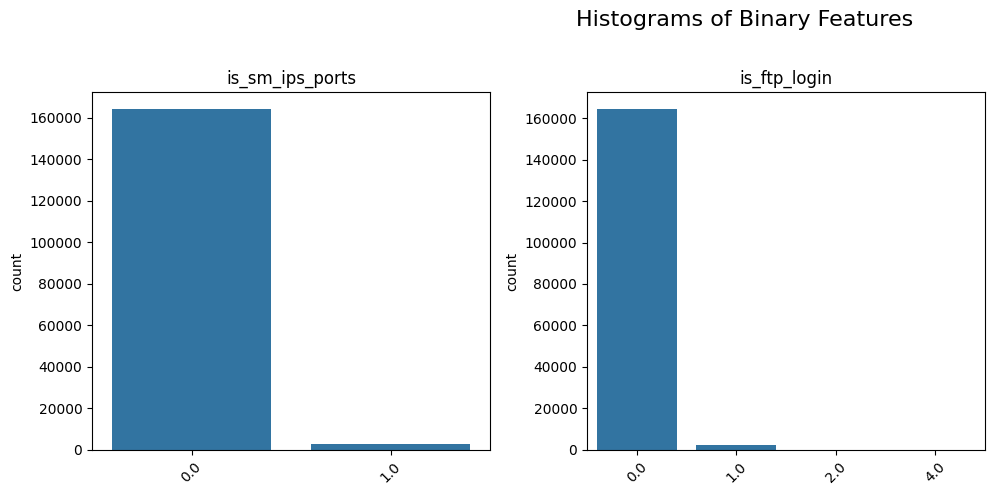

In [312]:
# Untuk melihat seberapa banyak sih missing value di binary features
# Function to plot histograms
def plot_histograms(data, features, feature_type):
    if not features:  # Check for empty feature list
        print(f"No {feature_type} features to plot.")
        return

    num_plots = len(features)
    num_cols = 3  # Number of columns for subplots
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    fig.suptitle(f'Histograms of {feature_type} Features', fontsize=16)

    # Ensure axes is always 2D for consistency
    axes = axes.reshape(-1) if num_rows == 1 else axes.flat

    for i, feature in enumerate(features):
        ax = axes[i]
        if feature_type == 'Numerical':
            sns.histplot(data[feature], ax=ax, kde=True)
        else:
            sns.countplot(x=feature, data=data, ax=ax)
            ax.tick_params(axis='x', rotation=45)

        ax.set_title(feature)
        ax.set_xlabel('')  # Remove x-axis label

    # Remove unused subplots
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for suptitle
    plt.show()

# Plot histograms for each feature type
plot_histograms(df_train, binary_features, 'Binary')


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [313]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [314]:
class FillMissingValues(BaseEstimator, TransformerMixin):
    def __init__(self, binary_features, categorical_features, numerical_features):
        self.binary_features = binary_features
        self.categorical_features = categorical_features
        self.numerical_features = numerical_features
        
    def fit(self, X, y=None):
      return self  # Gaperlu fitting samsek

    def transform(self, X):
      print("\nTransforming FillMissingValues...")
      for feature in self.binary_features:
        # Isi NA dengan -1 terlebih dahulu
        X[feature] = X[feature].fillna(-1)
        # Konversi nilai menjadi integer
        X[feature] = X[feature].astype(int)

      X[self.categorical_features] = X[self.categorical_features].fillna("Unknown")

      for feature in self.numerical_features:
        # 1. Akhirnya diisi median AWKOAWKOAW
        X[feature] = X[feature].fillna(X[feature].median())

        # 2. Metode Iterative Imputer ga kelar kelar 🗿🙏🙏
          # imputer = IterativeImputer(max_iter=10, random_state=42)
          # data[numerical_features] = imputer.fit_transform(data[numerical_features])

        # 3. Metode Randomforest ga kelar kelar 🗿🙏🙏
          # train_data = data[data[col].notna()]
          # predict_data = data[data[col].isna()]

          # X_train = train_data.drop(columns=[col])
          # y_train = train_data[col]
          # X_train = pd.get_dummies(X_train, drop_first=True)

          # X_predict = predict_data.drop(columns=[col])
          # X_predict = pd.get_dummies(X_predict, drop_first=True)
          # X_predict = X_predict.reindex(columns=X_train.columns, fill_value=0)

          # model = RandomForestRegressor(random_state=42, n_estimators=100)
          # model.fit(X_train, y_train)
          # data.loc[data[col].isna(), col] = model.predict(X_predict)

      display(X)
      return X

# Diprint lagi biar keliatan before afternya
# display_feature_summaries(df_train, categorical_features, numerical_features, binary_features)

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [315]:
class TransformOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_features):
        self.numerical_features = numerical_features

    def fit(self, X, y=None):
        return self  # No fitting required

    def transform(self, X):
        print("\nTransforming TransformOutliers...")
        
        # # Sebelum dilakukan transformasi outlier
        # print("Sebelum dilakukan transformasi outlier")
        # plt.figure(figsize=(10, 6))
        # plt.hist(X['sbytes'], bins=30, edgecolor='k', alpha=0.7)
        # plt.title('Histogram of sbytes')
        # plt.xlabel('sbytes')
        # plt.ylabel('Frequency')
        # plt.grid(True)
        # plt.show()

        #1. Outlier di numerik di-cap ke batas atas dan bawah quartil
        for feature in numerical_features:
            Q1 = X[feature].quantile(0.25)
            Q3 = X[feature].quantile(0.75)

            IQR = Q3 - Q1

            X[feature] = X[feature].apply(lambda x: max(x, Q1 - 1.5 * IQR) if x < (Q1 - 1.5 * IQR) else x)
            X[feature] = X[feature].apply(lambda x: min(x, Q3 + 1.5 * IQR) if x > (Q3 + 1.5 * IQR) else x)

        #2. Untuk kategorikal udah dicek secara EDA (kasat mata) tu aman

        #3. Untuk binary coy ada yg eror
        #Katanya is_ftp_login binary tapi kok ada juga yg nilainya 2 dan 4?
        X['is_ftp_login'] = X['is_ftp_login'].apply(lambda x: x if x in [0, 1] else -1)
        
        # # Sesudah dilakukan transformasi outlier
        # print("Sesudah dilakukan transformasi outlier")
        # plt.figure(figsize=(10, 6))
        # plt.hist(X['sbytes'], bins=30, edgecolor='k', alpha=0.7)
        # plt.title('Histogram of sbytes')
        # plt.xlabel('sbytes')
        # plt.ylabel('Frequency')
        # plt.grid(True)
        # plt.show()
        # print('Dhidittest')
        # display(X)
        return X

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [316]:
# Write your code here
class RemoveDuplicates():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self  # No fitting required

    def transform(self, X):
        duplicate_count = X.duplicated().sum()
        markdown_content = "### Duplicates\n"
        markdown_content += f"* Total duplicates: {duplicate_count}\n"
        display(Markdown(markdown_content))

        # View the duplicated rows
        if duplicate_count > 0:
            duplicates = X[X.duplicated(keep=False)]
            markdown_content = "#### Duplicate rows\n"
            display(Markdown(markdown_content))
            display(duplicates)

            X.drop_duplicates(inplace=True)
            markdown_content = f"* Duplicates removed.\n"
            display(Markdown(markdown_content))
        else:
            markdown_content = f"* No duplicates found.\n"
            display(Markdown(markdown_content))
        print("\nTransform RemoveDuplicates")
        # display(X)
        return X

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [317]:
from sklearn.ensemble import RandomForestClassifier

# Feature Selection
print("Banyaknya fitur sebelum dihapus", len(feature_names))
print(feature_names)

def feature_selection(df_train):
    global feature_names
    global numerical_features
    corr_matrix = df_train[numerical_features].corr()
    selection_threshold = 0.8

    # Split the data into X and y
    X = df_train[numerical_features]
    y = df_train['attack_cat']

    # Train a RandomForestClassifier to get feature importances
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    feature_importances = pd.Series(rf.feature_importances_, index=numerical_features)

    # Identify highly correlated features
    high_corr_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > selection_threshold:
                feature_i = corr_matrix.columns[i]
                feature_j = corr_matrix.columns[j]
                # Drop the less important feature
                if feature_importances[feature_i] > feature_importances[feature_j]:
                    high_corr_features.add(feature_j)
                    print("Highly correlated features:", feature_j)
                else:
                    high_corr_features.add(feature_i)
                    print("Highly correlated features:", feature_i)

    # tambahkan protocol ke high_corr_features
    high_corr_features.add('proto')
    return high_corr_features

high_corr_features = feature_selection(df_train)
df_train.drop(columns=high_corr_features, inplace=True)
df_test.drop(columns=high_corr_features, inplace=True)

feature_names = [feature for feature in feature_names if feature not in high_corr_features]
numerical_features = [feature for feature in numerical_features if feature not in high_corr_features]
categorical_features = [feature for feature in categorical_features if feature not in high_corr_features]

# print(len(feature_names))

Banyaknya fitur sebelum dihapus 42
['is_sm_ips_ports', 'is_ftp_login', 'state', 'service', 'proto', 'attack_cat', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat']
Highly correlated features: ct_srv_src
Highly correlated features: ct_dst_ltm
Highly correlated features: ct_dst_ltm
Highly correlated features: ct_src_ltm
Highly correlated features: ct_src_dport_ltm
Highly correlated features: ct_src_dport_ltm
Highly correlated features: ct_dst_ltm
Highly correlated features: ct_src_ltm
Highly correlated features: ct_srv_src
Highly correlated features: ct_dst_sport_ltm
Highly correlated features: ct_dst_ltm
Highly correlated featur

In [318]:
print(feature_names)

['is_sm_ips_ports', 'is_ftp_login', 'state', 'service', 'attack_cat', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_dst_src_ltm', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'swin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'synack', 'ackdat']


In [319]:
display(df_test)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_dst_src_ltm,id,state,dur,sbytes,...,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,synack,ackdat
0,0.0,1.0,0.0,0.0,0.0,2.0,0,FIN,0.454980,534.0,...,53.0,45.0,0.0,0.0,2737.954123,118.833969,48.756556,76.593602,0.072001,0.093116
1,0.0,1.0,0.0,NaN,0.0,5.0,1,FIN,0.648037,8854.0,...,632.0,45.0,0.0,0.0,2938.299144,165.780563,49.812539,109.557602,0.100248,0.123356
2,0.0,1.0,0.0,0.0,0.0,4.0,2,FIN,1.120856,3440.0,...,215.0,54.0,0.0,0.0,4287.453629,129.471406,69.765530,94.395906,0.082498,0.030691
3,0.0,2.0,0.0,0.0,0.0,4.0,3,INT,0.000001,244.0,...,NaN,0.0,0.0,0.0,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000
4,NaN,0.0,NaN,0.0,0.0,7.0,4,FIN,0.264763,1540.0,...,96.0,91.0,0.0,0.0,1119.063538,26.748141,17.628799,15.543294,0.000526,0.000129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,0.0,1.0,0.0,0.0,0.0,2.0,20578,FIN,1.769733,135649.0,...,1211.0,44.0,0.0,0.0,1902.551328,143.722203,16.088482,87.730055,0.071119,0.046355
20579,0.0,0.0,0.0,0.0,0.0,1.0,20579,FIN,0.400782,5080.0,...,181.0,103.0,0.0,0.0,858.139465,22.118752,14.832222,13.803000,0.000491,0.000156
20580,0.0,2.0,0.0,0.0,0.0,4.0,20580,INT,0.000011,114.0,...,57.0,0.0,0.0,0.0,0.000000,0.000000,NaN,0.000000,NaN,0.000000
20581,0.0,2.0,0.0,0.0,0.0,4.0,20581,INT,0.000004,200.0,...,100.0,0.0,0.0,0.0,0.000000,0.000000,0.011000,0.000000,0.000000,0.000000


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [320]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [321]:
class ScaleFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, method: None, feature_names: None):
        self.method = 'minmax'
        self.feature_names = feature_names
        self.scaler = None

    def fit(self, X, y=None):
        print("\nFitting ScaleFeatures...")
        display(X)
        if self.method not in ['minmax', 'standardization', 'robust', 'log']:
            raise ValueError("Invalid method. Choose from 'minmax', 'standardization', 'robust', 'log'.")
        
        print("Ini feature_names")
        print(self.feature_names)
        #print banyaknya feature_names
        print(len(self.feature_names))
        X_train = np.array(X)
        
        if self.method in ['minmax', 'standardization', 'robust']:
            if self.method == 'minmax':
                self.scaler = MinMaxScaler()
            elif self.method == 'robust':
                self.scaler = RobustScaler()
            else:
                self.scaler = StandardScaler()
            self.scaler.fit(X_train)
        
        elif self.method == 'log':
            # Pastiin gada yang negatif atau 0
            if np.any(X_train <= 0):
                raise ValueError("Log transformation requires all feature values to be positive.")
            self.scaler = None
        
        return self

    def transform(self, X):
        print("\nTransform ScaleFeatures...")
        X = np.array(X)
        if self.method in ['minmax', 'standardization', 'robust']:
            if not hasattr(self, 'scaler') or self.scaler is None:
                raise RuntimeError("The scaler has not been fitted. Call 'fit' before 'transform'.")
            X_scaled = self.scaler.transform(X)

        elif self.method == 'log':
            if np.any(X <= 0):
                raise ValueError("Log transformation requires all feature values to be positive.")
            X_scaled = np.log(X)

        else:
            raise ValueError("Invalid method. Choose from 'minmax', 'standardization', 'robust', 'log'.")
        
        

        if self.feature_names is not None:
            # display(pd.DataFrame(X_scaled, columns=self.feature_names))
            X = pd.DataFrame(X_scaled, columns=self.feature_names)
            # display(X)
            return X
        else:
            # display(pd.DataFrame(X_scaled))
            X = pd.DataFrame(X_scaled)
            # display(X)
            return X
            


    def inverse_transform(self, X):
        if self.method in ['minmax', 'standardization', 'robust']:
            if not hasattr(self, 'scaler') or self.scaler is None:
                raise RuntimeError("The scaler has not been fitted. Call 'fit' before 'inverse_transform'.")
            X_original = self.scaler.inverse_transform(X)
        else:
            raise NotImplementedError("Inverse transform is not supported for 'log' method.")
        
        return X_original
    
# columns_to_drop = df_train.columns[df_train.columns.str.startswith('attack_cat')]
# X_train = df_train.drop(columns=columns_to_drop)
# columns_X_train = X_train.columns
# # X_test = df_train
# print("Before scaling:")
# print("X_train:")
# print(X_train)
# # print("X_test:")
# # print(X_test)
# X_train = scale_features(X_train, method='minmax', feature_names=columns_X_train)
# print("After scaling:")
# print("X_train:")
# print(X_train)
# # print("X_test:")
# # print(X_test)

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [322]:
feature_names = []
X_train_set_transformed_feature = []
counter = 0

In [323]:
class EncodeFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, binary_features, nominal_features):
        self.binary_features = binary_features
        self.nominal_features = nominal_features
        self.encoder = None

    def fit(self, X, y=None):
        print("Sebelum diencode")
        # display(X)
        return self

    def transform(self, X):

        global feature_names
        
        print("\nTransforming EncodeFeatures...")
        if not self.nominal_features:
            print("No nominal features to encode.")
            return self

        self.encoder = OneHotEncoder(sparse_output=False, drop='first')
        print("Nominal features to encode:", self.nominal_features)

        self.encoder.fit(X[self.nominal_features])
        

        X_transformed = X.copy()

        # Untuk binary_features sebab udah 0,1, jadi gausah diapa-apain lagi
        for feature in self.binary_features:
            X_transformed[feature] = X_transformed[feature].astype(int)

        # Transform nominal
        categorical_encoded = self.encoder.transform(X_transformed[self.nominal_features])
        categorical_encoded_data = pd.DataFrame(
            categorical_encoded, 
            columns=self.encoder.get_feature_names_out(self.nominal_features), 
            index=X_transformed.index
        )

        # Drop nominal yang asli
        X_transformed.drop(columns=self.nominal_features, inplace=True)
        X_transformed = pd.concat([X_transformed, categorical_encoded_data], axis=1)
        
        # display(X_transformed)
        feature_names = X_transformed.columns.tolist()

        
        X = X_transformed
        print("Sesudah diencode")
        # display(X)
        return X_transformed

    def inverse_transform(self, X):
        X_decoded = X.copy()
        
        # Nominal features
        nominal_decoded = self.encoder.inverse_transform(
            X_decoded[self.encoder.get_feature_names_out(self.nominal_features)]
        )
        nominal_decoded_df = pd.DataFrame(
            nominal_decoded,
            columns=self.nominal_features,
            index=X_decoded.index
        )
        
        # Drop encoded nominal columns and masukin yang original nominal features
        X_decoded.drop(columns=self.encoder.get_feature_names_out(self.nominal_features), inplace=True)
        X_decoded = pd.concat([X_decoded, nominal_decoded_df], axis=1)
        
        return X_decoded
    

class FixOrder():
    def __init__(self, X_feature):
        self.X_feature = X_feature

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        global counter
        print("Ini counter, ", counter)
        X = X[self.X_feature]
        return X


### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [324]:
# Handling imbalance versi pipeline:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin
print("y_train sebelum dihandle")
y_train = df_train['attack_cat']
display (y_train)
class HandlingImbalanced(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.oversample = None
        self.undersample = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        print("\nFitting HandlingImbalanced...")
        global y_train
        # display(y_train)
        # Output dimensi y_trains sebelum di-resample
        # print("y_train Before resampling:")
        # display(y_train)
        # print("X Before resampling:")
        # display(X)

        self.oversample = SMOTE(sampling_strategy='minority')
        self.undersample = RandomUnderSampler(sampling_strategy='majority')

        # Bikin pipeline biar gampang
        pipeline = Pipeline(steps=[('u', self.undersample), ('o', self.oversample)])

        # Tidak perlu dipisah karena udah dipisah 

        # Lakukan fitting resampling
        X_sampled, y_sampled= pipeline.fit_resample(X, y_train)
        # Output dimensi y_trains sesudah di-resample
        
        X = X_sampled
        y_train = y_sampled
 
        print("y_train After resampling:")
        display(y_train)
        print("X After resampling:")
        display(X)
   
        return X

y_train sebelum dihandle


0           Normal
1          Generic
2         Exploits
3           Normal
4           Normal
            ...   
175336     Generic
175337    Exploits
175338     Generic
175339     Generic
175340     Generic
Name: attack_cat, Length: 175341, dtype: object

In [325]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# is_resample = False

# # The dataset must be in numerical form before applying the resampling techniques

# if is_resample:
#     markdown_content = "### Resampling\n\n"
#     markdown_content += f"* Resampling is applied. (set is_resample to False to disable resampling)\n"
#     # Visualize the balance comparison of the target feature (attack_cat feature is already one hot encoded)
#     one_hot_attack_cat = df_train.filter(like='attack_cat')
#     melted_attack_cat = one_hot_attack_cat.melt(var_name='attack_cat', value_name='value')
#     melted_attack_cat = melted_attack_cat[melted_attack_cat['value'] == 1]

#     fig, axes = plt.subplots(1, 2, figsize=(20, 8))

#     # Plot before resampling
#     sns.countplot(x='attack_cat', data=melted_attack_cat, ax=axes[0])
#     axes[0].set_title('Distribution of attack_cat before resampling')
#     axes[0].tick_params(axis='x', rotation=90)

#     # Define the oversampling and undersampling strategy
#     oversample = SMOTE(sampling_strategy='minority')
#     undersample = RandomUnderSampler(sampling_strategy='majority')

#     # Create a pipeline with undersampling followed by oversampling
#     pipeline = Pipeline(steps=[('u', undersample), ('o', oversample)])

#     # Separate features and target
#     X = df_train.drop(columns=one_hot_attack_cat.columns)
#     y = df_train[one_hot_attack_cat.columns].idxmax(axis=1)

#     # Apply the resampling pipeline
#     X_resampled, y_resampled = pipeline.fit_resample(X, y)

#     # Convert the resampled target back to one-hot encoding
#     y_resampled_one_hot = pd.get_dummies(y_resampled, prefix='attack_cat')

#     # Combine the resampled features and target
#     df_train_resampled = pd.concat([X_resampled, y_resampled_one_hot], axis=1)

#     # Visualize the balance comparison of the target feature after resampling
#     melted_attack_cat_resampled = y_resampled_one_hot.melt(var_name='attack_cat', value_name='value')
#     melted_attack_cat_resampled = melted_attack_cat_resampled[melted_attack_cat_resampled['value'] == 1]
#     sn.countplot(x='attack_cat', data=melted_attack_cat_resampled, ax=axes[1])
#     axes[1].set_title('Distribution of attack_cat after resampling')
#     axes[1].tick_params(axis='x', rotation=90)

#     plt.tight_layout()
#     plt.show()
# else:
#     markdown_content = "### Resampling\n"
#     markdown_content += f"* Resampling is not applied. (set is_resample to True to enable resampling)\n"

# display(Markdown(markdown_content)) 

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [326]:
class NormalizationYeoJohnson(BaseEstimator, TransformerMixin):
    def __init__(self, standardize=False, feature_names=None):
        self.standardize = standardize
        self.transformer = None
        self.feature_names = feature_names

    def fit(self, X, y=None):
        print("Fitting NormalizationYeoJohnson")
        self.transformer = PowerTransformer(method='yeo-johnson', standardize=self.standardize)
        self.transformer.fit(np.array(X).reshape(-1, 1))
        return self

    def transform(self, X):
        print("Transform NormalizationYeoJohnson")
        # Kalau yang dipanggil transform doang, tanpa fit
        if self.transformer is None:
            raise ValueError("The transformer has not been fitted yet. Call 'fit' first.")
        X_transformed = self.transformer.transform(np.array(X).reshape(-1, 1))
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.hist(X_transformed, bins=25)
        plt.show()
        X_transformed = X_transformed.reshape(1, -1)
        display(X_transformed)
        return X_transformed


### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [327]:
from sklearn.decomposition import PCA

class PCAManual(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.pca_model = None  # Placeholder for PCA model
        self.transformed_data = None

    def fit(self, X):
        print("Fitting PCA...")
        # display(X)
        # print berapa banyak feature
        print("Number of features before PCA:", X.shape[1])
        self.pca_model = PCA(n_components=2)
        self.pca_model.fit(X)
        print(f"PCA model fitted with {2} components.")

        return self

    def transform(self, X):
        print("Transform PCA...")
        if self.pca_model is None:
            raise ValueError("PCA model is not fitted. Call `fit` before `transform`.")
        
        X = self.pca_model.transform(X)
    
        display(X)
        # print berapa banyak feature
        print("Number of features after PCA:", X.shape[1])
        return X

    def visualize(self):
        if self.transformed_data is None:
            raise ValueError("No transformed data found. Call `transform` first.")
        
        plt.scatter(self.transformed_data[:, 0], self.transformed_data[:, 1])
        plt.title('PCA Result')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

class TSNEPipeline(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tsne_model = None  # Placeholder for t-SNE model
        self.transformed_data = None

    def fit_transform(self, X, n_components=2, random_state=42, **kwargs):
        print("Fit and Transform TSNE...")
        self.tsne_model = TSNE(n_components=n_components, random_state=random_state, **kwargs)
        self.transformed_data = self.tsne_model.fit_transform(X)
        return self.transformed_data

    def visualize(self):
        if self.transformed_data is None:
            raise ValueError("No transformed data found. Call `fit_transform` first.")
        
        plt.scatter(self.transformed_data[:, 0], self.transformed_data[:, 1])
        plt.title('t-SNE Result')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.show()


class AutoencoderPipeline(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.autoencoder = None  # Placeholder for autoencoder model
        self.encoder = None  # Placeholder for encoder model
        self.encoded_data = None

    def fit(self, X, encoding_dim=2, epochs=2, batch_size=256, validation_split=0.2):
        print("Fitting Autoecoder...")
        input_dim = X.shape[1]

        # Autoencoder architecture
        input_layer = Input(shape=(input_dim,))
        encoded = Dense(encoding_dim, activation='relu')(input_layer)
        decoded = Dense(input_dim, activation='sigmoid')(encoded)

        # Autoencoder and encoder models
        self.autoencoder = Model(input_layer, decoded)
        self.encoder = Model(input_layer, encoded)

        # Compile and train the autoencoder
        self.autoencoder.compile(optimizer='adam', loss='mse')
        self.autoencoder.fit(X, X, 
                             epochs=epochs, 
                             batch_size=batch_size, 
                             shuffle=True, 
                             validation_split=validation_split)
        return self

    def transform(self, X):
        print("Transform Autoencoder...")
        if self.encoder is None:
            raise ValueError("The model has not been fitted yet. Call `fit` first.")
        self.encoded_data = self.encoder.predict(X)
        display(self.encoded_data)
        return self.encoded_data

    def visualize(self):
        if self.encoded_data is None:
            raise ValueError("No encoded data found. Call `transform` first.")
        
        plt.scatter(self.encoded_data[:, 0], self.encoded_data[:, 1])
        plt.title('Autoencoder Result')
        plt.xlabel('Encoded Dimension 1')
        plt.ylabel('Encoded Dimension 2')
        plt.show()

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [328]:
# Permasalahan: Terdapat beberapa unique values yang tidak tersedia pada data test
# Akibatnya, jumlah kolom pada data test lebih sedikit dibandingkan data train setelah di-encode

def list_of_unique(data, column):
    list = data[column].dropna().unique().tolist()
    list.append('Unknown')
    return list

unique_states = list_of_unique(df_train, 'state')
unique_services = list_of_unique(df_train, 'service')
# unique_protos = list_of_unique(df_train, 'proto')


#output dan hitung berapa banyak elemen dalam array
print("Unique states:", unique_states)  # 132 
print("Count states: ", len(unique_states)) # 132
print("Unique services:", unique_services) # 13
print("Count services:", len(unique_services)) # 13
# print("Unique protocols:", unique_protos) # 133
# print("Count protocols:", len(unique_protos))

# Maka dari itu, dibuatlah fungsi untuk menambahkan kolom yang hilang pada data test
def add_missing_columns(data, unique_values, prefix):
    for value in unique_values:
        column_name = f"{prefix}_{value}"
        if column_name not in data.columns:
            print(column_name, "hilang, akan ditambahkan")
            data[column_name] = 0

class AddMissingFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, unique_states, unique_services):
        self.uniques_states = unique_states
        self.unique_services = unique_services
        # self.unique_protos = unique_protos

    def fit(self, X, y=None):
        print("\nFitting AddMissingFeatures...")
        return self  # No fitting required

    def transform(self, X):
        global counter
        global X_train_set_transformed_feature
        #hitung jumlah kolom sebelum
        print("Jumlah kolom sebelum:", X.shape[1])
        # buat list of nama nama kolom, lalu print list tersebut
        list_of_columns = X.columns.tolist()
        print("List of columns:", list_of_columns)
        print("\nTransforming AddMissingFeatures...")
        add_missing_columns(X, self.uniques_states, 'state')
        add_missing_columns(X, self.unique_services, 'service')
        # add_missing_columns(X, self.unique_protos, 'proto')
        #hitung jumlah kolom sesudah
        print("Jumlah kolom sesudah:", X.shape[1])
        # buat list of nama nama kolom, lalu print
        list_of_columns_after = X.columns.tolist()
        print("List of columns after:", list_of_columns_after)

        #update feature_names
        global feature_names
        feature_names = X.columns.tolist()
        if counter == 0:
            print(counter)
            counter = counter + 1
            X_train_set_transformed_feature = feature_names
        display(X)

        # Terakhir, samain urutan kolom fitur dengan feature names
        X = X[feature_names]
        return X

Unique states: ['FIN', 'INT', 'CON', 'REQ', 'ECO', 'RST', 'URN', 'PAR', 'no', 'Unknown']
Count states:  10
Unique services: ['-', 'dns', 'smtp', 'http', 'pop3', 'ftp', 'ssh', 'ftp-data', 'ssl', 'dhcp', 'snmp', 'radius', 'irc', 'Unknown']
Count services: 14


In [329]:
print(y_train)

0           Normal
1          Generic
2         Exploits
3           Normal
4           Normal
            ...   
175336     Generic
175337    Exploits
175338     Generic
175339     Generic
175340     Generic
Name: attack_cat, Length: 175341, dtype: object


In [330]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA

# list of binary features
binary_features = ['is_sm_ips_ports', 'is_ftp_login']

# list of categorical 
categorical_features = ['state', 'service']

# list of numerical features
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Filter out binary features from numerical features
for feature in binary_features:
    if feature in numerical_features:
        numerical_features.remove(feature)
numerical_features.remove('id')

pipe = Pipeline(steps=[
    ("fill_missing_values", FunctionTransformer(lambda X: FillMissingValues(
    binary_features=binary_features,
    categorical_features=categorical_features,
    numerical_features=numerical_features).transform(X))),

    ("remove_duplicates", FunctionTransformer(lambda X: RemoveDuplicates().transform(X))),
    
    ("transform_outliers", FunctionTransformer(lambda X: TransformOutliers(
        numerical_features=numerical_features).transform(X))),
    
    # Setelah di-encode, jumlah fitur akan meningkat drastis
    ("encode_features", FunctionTransformer(lambda X: EncodeFeatures(
        binary_features=binary_features,
        nominal_features=['state', 'service']).transform(X))),
    
    # Memperbaiki fitur yang hilang dengan menambahkan kolom yang hilang
    ("add_missing_features", FunctionTransformer(lambda X: AddMissingFeatures(unique_states, unique_services).fit_transform(X))),

    # Memperbaiki urutan fitur
    ("fix_order", FunctionTransformer(lambda X: FixOrder(X_feature=X_train_set_transformed_feature).transform(X))),
    
    # Feature scalling
    ("scale_features", FunctionTransformer(lambda X: ScaleFeatures(method="minmax", feature_names=X_train_set_transformed_feature).fit_transform(X))),
    
    # Handling imbalanced
    ("handling_imbalanced", FunctionTransformer(lambda X: HandlingImbalanced().fit_transform(X))),
    
    # # Data Normalization
    # ("normalization_yoe_johnson", PowerTransformer(method="yeo-johnson")),
    
    # #Dimensionality Reduction
    #  ("dimensionality_reduction", PCA(n_components=2))  
    # # TSNE lama beut jir
    # ("tsne", FunctionTransformer(lambda X: TSNEPipeline().fit_transform(X))),
    
    # ("autoencoder", FunctionTransformer(lambda X: AutoencoderPipeline().fit_transform(X))),
])

# Applying the Pipeline
X_train = df_train.drop(columns=['attack_cat'])
pipe_train = Pipeline([
    step for step in pipe.steps if step[0] != "fix_order"
])
X_train_set_transformed = pipe_train.fit_transform(X_train)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)



Transforming FillMissingValues...


,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_dst_src_ltm,id,state,dur,sbytes,...,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,synack,ackdat
0,0,0.0,0.0,0,0.0,5.0,0,FIN,2.736664,13350.0,...,58.0,44.0,0.0,0.0,4449.110313,3234.831566,11.845558,6.261361,0.000444,0.000114
1,0,2.0,0.0,0,0.0,10.0,1,INT,0.000009,114.0,...,57.0,0.0,0.0,0.0,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000
2,0,1.0,0.0,0,0.0,4.0,2,FIN,5.788526,6102.0,...,170.0,114.0,0.0,0.0,8561.040438,249.950547,165.386453,172.345750,0.057902,0.100924
3,0,0.0,0.0,0,0.0,6.0,3,FIN,3.849634,25160.0,...,56.0,1276.0,0.0,0.0,4053.086020,2918.730804,8.669644,4.496707,0.000448,0.000000
4,0,0.0,0.0,0,0.0,1.0,4,CON,0.001052,130.0,...,65.0,81.0,0.0,0.0,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0,2.0,0.0,0,0.0,38.0,175336,INT,0.000005,114.0,...,57.0,0.0,0.0,0.0,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000
175337,0,1.0,0.0,1,1.0,2.0,175337,FIN,4.449357,1272.0,...,53.0,74.0,0.0,0.0,15464.286700,531.848125,193.445428,209.600766,0.047738,0.018786
175338,0,2.0,0.0,-1,0.0,33.0,175338,INT,0.000008,114.0,...,57.0,0.0,0.0,0.0,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000
175339,0,2.0,0.0,0,0.0,36.0,175339,INT,0.000004,114.0,...,57.0,0.0,0.0,0.0,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000


### Duplicates
* Total duplicates: 0


* No duplicates found.



Transform RemoveDuplicates

Transforming TransformOutliers...

Transforming EncodeFeatures...
Nominal features to encode: ['state', 'service']
Sesudah diencode

Fitting AddMissingFeatures...
Jumlah kolom sebelum: 49
List of columns: ['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_dst_src_ltm', 'id', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'swin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'synack', 'ackdat', 'state_ECO', 'state_FIN', 'state_INT', 'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'state_Unknown', 'state_no', 'service_Unknown', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl']

Transforming AddMissingFeatures...
state_CON hilang, akan ditambahkan
service_- hilang, akan ditambahkan
Jumlah kolom sesudah:

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_dst_src_ltm,id,dur,sbytes,dbytes,...,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,service_-
0,0,0.0,0.0,0,0.0,5.0,0,1.564138,2989.0,2080.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,2.0,0.0,0,0.0,10.0,1,0.000009,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,1.0,0.0,0,0.0,4.0,2,1.564138,2989.0,2080.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0,0.0,0.0,0,0.0,6.0,3,1.564138,2989.0,164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0,0.0,0.0,0,0.0,1.0,4,0.001052,130.0,162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0,2.0,0.0,0,0.0,23.5,175336,0.000005,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
175337,0,1.0,0.0,1,0.0,2.0,175337,1.564138,1272.0,1634.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
175338,0,2.0,0.0,-1,0.0,23.5,175338,0.000008,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
175339,0,2.0,0.0,0,0.0,23.5,175339,0.000004,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0



Fitting ScaleFeatures...


,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_dst_src_ltm,id,dur,sbytes,dbytes,...,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,service_-
0,0,0.0,0.0,0,0.0,5.0,0,1.564138,2989.0,2080.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,2.0,0.0,0,0.0,10.0,1,0.000009,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,1.0,0.0,0,0.0,4.0,2,1.564138,2989.0,2080.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0,0.0,0.0,0,0.0,6.0,3,1.564138,2989.0,164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0,0.0,0.0,0,0.0,1.0,4,0.001052,130.0,162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0,2.0,0.0,0,0.0,23.5,175336,0.000005,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
175337,0,1.0,0.0,1,0.0,2.0,175337,1.564138,1272.0,1634.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
175338,0,2.0,0.0,-1,0.0,23.5,175338,0.000008,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
175339,0,2.0,0.0,0,0.0,23.5,175339,0.000004,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Ini feature_names
['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_dst_src_ltm', 'id', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'swin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'synack', 'ackdat', 'state_ECO', 'state_FIN', 'state_INT', 'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'state_Unknown', 'state_no', 'service_Unknown', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'service_-']
51

Transform ScaleFeatures...

Fitting HandlingImbalanced...
y_train After resampling:


0         Analysis
1         Analysis
2         Analysis
3         Analysis
4         Analysis
            ...   
159336      Normal
159337      Normal
159338      Normal
159339      Normal
159340      Normal
Name: attack_cat, Length: 159341, dtype: object

X After resampling:


,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_dst_src_ltm,id,dur,sbytes,dbytes,...,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,service_-
0,0.5,0.571429,0.0,0.5,0.0,0.133333,0.000376,1.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.571429,0.0,0.0,0.0,0.000000,0.000662,0.000002,0.058088,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.571429,0.0,0.5,0.0,0.222222,0.000855,0.000006,0.058088,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.285714,0.0,0.5,0.0,0.044444,0.001489,0.357927,0.263425,0.639423,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.571429,0.0,0.5,0.0,0.177778,0.001694,0.000004,0.058088,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159336,0.5,0.255967,0.0,0.5,0.0,0.044444,0.342186,0.014700,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159337,0.5,0.000000,0.0,0.5,0.0,0.194432,0.467458,0.011629,0.510638,0.790385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159338,0.5,0.000000,0.0,0.5,0.0,0.000000,0.500828,0.004267,0.701055,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159339,0.5,0.000000,0.0,0.5,0.0,0.088889,0.570801,0.237279,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [344]:
display(X_train_set_transformed)
# print(np.unique(y_train))
# print(label_encoder.inverse_transform(np.unique(y_train)))



,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_dst_src_ltm,id,dur,sbytes,dbytes,...,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,service_-
0,0.5,0.571429,0.0,0.5,0.0,0.133333,0.000376,1.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.571429,0.0,0.0,0.0,0.000000,0.000662,0.000002,0.058088,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.571429,0.0,0.5,0.0,0.222222,0.000855,0.000006,0.058088,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.285714,0.0,0.5,0.0,0.044444,0.001489,0.357927,0.263425,0.639423,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.571429,0.0,0.5,0.0,0.177778,0.001694,0.000004,0.058088,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159336,0.5,0.255967,0.0,0.5,0.0,0.044444,0.342186,0.014700,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159337,0.5,0.000000,0.0,0.5,0.0,0.194432,0.467458,0.011629,0.510638,0.790385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159338,0.5,0.000000,0.0,0.5,0.0,0.000000,0.500828,0.004267,0.701055,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159339,0.5,0.000000,0.0,0.5,0.0,0.088889,0.570801,0.237279,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [332]:
# Menerapkan pipeline ke data test
# BTW data testing gausah dihandle imbalance, nanti berubah dong kalo dihandle
X_test = df_test
pipe_test = Pipeline([
    step for step in pipe.steps if step[0] != "handling_imbalanced"
])
X_test_set_transformed = pipe_test.transform(X_test)



Transforming FillMissingValues...


,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_dst_src_ltm,id,state,dur,sbytes,...,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,synack,ackdat
0,0,1.0,0.0,0,0.0,2.0,0,FIN,0.454980,534.0,...,53.0,45.0,0.0,0.0,2737.954123,118.833969,48.756556,76.593602,0.072001,0.093116
1,0,1.0,0.0,-1,0.0,5.0,1,FIN,0.648037,8854.0,...,632.0,45.0,0.0,0.0,2938.299144,165.780563,49.812539,109.557602,0.100248,0.123356
2,0,1.0,0.0,0,0.0,4.0,2,FIN,1.120856,3440.0,...,215.0,54.0,0.0,0.0,4287.453629,129.471406,69.765530,94.395906,0.082498,0.030691
3,0,2.0,0.0,0,0.0,4.0,3,INT,0.000001,244.0,...,65.0,0.0,0.0,0.0,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000
4,-1,0.0,0.0,0,0.0,7.0,4,FIN,0.264763,1540.0,...,96.0,91.0,0.0,0.0,1119.063538,26.748141,17.628799,15.543294,0.000526,0.000129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,0,1.0,0.0,0,0.0,2.0,20578,FIN,1.769733,135649.0,...,1211.0,44.0,0.0,0.0,1902.551328,143.722203,16.088482,87.730055,0.071119,0.046355
20579,0,0.0,0.0,0,0.0,1.0,20579,FIN,0.400782,5080.0,...,181.0,103.0,0.0,0.0,858.139465,22.118752,14.832222,13.803000,0.000491,0.000156
20580,0,2.0,0.0,0,0.0,4.0,20580,INT,0.000011,114.0,...,57.0,0.0,0.0,0.0,0.000000,0.000000,0.560423,0.000000,0.000452,0.000000
20581,0,2.0,0.0,0,0.0,4.0,20581,INT,0.000004,200.0,...,100.0,0.0,0.0,0.0,0.000000,0.000000,0.011000,0.000000,0.000000,0.000000


### Duplicates
* Total duplicates: 0


* No duplicates found.



Transform RemoveDuplicates

Transforming TransformOutliers...

Transforming EncodeFeatures...
Nominal features to encode: ['state', 'service']
Sesudah diencode

Fitting AddMissingFeatures...
Jumlah kolom sebelum: 45
List of columns: ['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_dst_src_ltm', 'id', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'swin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'synack', 'ackdat', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_Unknown', 'service_Unknown', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl']

Transforming AddMissingFeatures...
state_ECO hilang, akan ditambahkan
state_RST hilang, akan ditambahkan
state_URN hilang, akan ditambahkan
state_PAR hilang, akan ditambahkan
st

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_dst_src_ltm,id,dur,sbytes,dbytes,...,service_smtp,service_snmp,service_ssh,service_ssl,state_ECO,state_RST,state_URN,state_PAR,state_no,service_-
0,0,1.0,0.0,0,0.0,2.0,0,0.454980,534.0,268.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0,1.0,0.0,-1,0.0,5.0,1,0.648037,2839.0,268.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,0,1.0,0.0,0,0.0,4.0,2,1.120856,2839.0,642.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,0,2.0,0.0,0,0.0,4.0,3,0.000001,244.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,-1,0.0,0.0,0,0.0,7.0,4,0.264763,1540.0,1644.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,0,1.0,0.0,0,0.0,2.0,20578,1.674048,2839.0,870.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
20579,0,0.0,0.0,0,0.0,1.0,20579,0.400782,2839.0,2060.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
20580,0,2.0,0.0,0,0.0,4.0,20580,0.000011,114.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
20581,0,2.0,0.0,0,0.0,4.0,20581,0.000004,200.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


Ini counter,  1

Fitting ScaleFeatures...


,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_dst_src_ltm,id,dur,sbytes,dbytes,...,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,service_-
0,0,1.0,0.0,0,0.0,2.0,0,0.454980,534.0,268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,1.0,0.0,-1,0.0,5.0,1,0.648037,2839.0,268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,1.0,0.0,0,0.0,4.0,2,1.120856,2839.0,642.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,2.0,0.0,0,0.0,4.0,3,0.000001,244.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-1,0.0,0.0,0,0.0,7.0,4,0.264763,1540.0,1644.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,0,1.0,0.0,0,0.0,2.0,20578,1.674048,2839.0,870.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
20579,0,0.0,0.0,0,0.0,1.0,20579,0.400782,2839.0,2060.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
20580,0,2.0,0.0,0,0.0,4.0,20580,0.000011,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
20581,0,2.0,0.0,0,0.0,4.0,20581,0.000004,200.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Ini feature_names
['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_dst_src_ltm', 'id', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'swin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'synack', 'ackdat', 'state_ECO', 'state_FIN', 'state_INT', 'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'state_Unknown', 'state_no', 'service_Unknown', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'service_-']
51

Transform ScaleFeatures...


In [346]:
# # Nyari tau udah sama belom urutan kolomnya
# # cari daftar nama kolom di X_test
# X_test_columns = X_test_set_transformed.columns.tolist()
# print(X_test_columns)
# # cari daftar nama kolom di X_train
# X_train_columns = X_train_set_transformed.columns.tolist()
# print(X_train_columns)
# # cek apakah dua duanya sama
# print(X_test_columns == X_train_columns)
display(X_test_set_transformed)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_dst_src_ltm,id,dur,sbytes,dbytes,...,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,service_-
0,0.5,0.285714,0.0,0.5,0.0,0.08,0.000000,2.717844e-01,0.181172,0.130097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.285714,0.0,0.0,0.0,0.32,0.000049,3.871078e-01,1.000000,0.130097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.285714,0.0,0.5,0.0,0.24,0.000097,6.695484e-01,1.000000,0.311650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.571429,0.0,0.5,0.0,0.24,0.000146,5.973545e-07,0.078153,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.5,0.0,0.48,0.000194,1.581574e-01,0.538544,0.798058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,0.5,0.285714,0.0,0.5,0.0,0.08,0.999806,1.000000e+00,1.000000,0.422330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20579,0.5,0.000000,0.0,0.5,0.0,0.00,0.999854,2.394089e-01,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20580,0.5,0.571429,0.0,0.5,0.0,0.24,0.999903,6.570900e-06,0.031972,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20581,0.5,0.571429,0.0,0.5,0.0,0.24,0.999951,2.389418e-06,0.062522,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [334]:
# from library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import subprocess

class KNN:
    def euclidean():
        # KNN with Euclidean distance
        return KNeighborsClassifier(n_neighbors=3, metric='euclidean')

    def manhattan():
        # KNN with Manhattan distance
        return KNeighborsClassifier(n_neighbors=3, metric='manhattan')

    def minkowski():
        # KNN with Minkowski distance (p=3)
        return KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=3)
    


In [340]:
from knn import KNN
class self_knn_implementation():
    def __init__(self, n_neighbors=3, metrik="euclidean", p="3"):
        self.n_neighbors = n_neighbors
        self. metrik = metrik
        self.p = p
        self.train_data_path = None

    def fit(self, train_data_path):
        """
        train_data_path gabungan X_train dan y_train dengan y_train di pojok kanan, mereka hasil dari preprocessing
        """
        self.train_data_path = train_data_path

    def predict(self, test_data_path):
        """
        data test merupakan test dari asisten
        """
        try:
            result = subprocess.run(["./knn", str(self.n_neighbors) , self.metrik, self.train_data_path, test_data_path, "predict"], capture_output=True, text=True)

            print("Output dari program C++:")
            print(result.stdout)

            # Tampilkan error jika ada
            if result.stderr:
                print("Error dari program C++:")
                print(result.stderr)

        except FileNotFoundError:
            print("Error: Model knn tidak ditemukan. Pastikan file ./knn telah dikompilasi.")
    def predict_proba(self, test_data_path):
        """
        data test merupakan test dari asisten
        """
        try:
            result = subprocess.run(["./knn", str(self.n_neighbors) , self.metrik, self.train_data_path, test_data_path, "predict_proba"], capture_output=True, text=True)

            print("Output dari program C++:")
            print(result.stdout)

            # Tampilkan error jika ada
            if result.stderr:
                print("Error dari program C++:")
                print(result.stderr)

        except FileNotFoundError:
            print("Error: Model knn tidak ditemukan. Pastikan file ./knn telah dikompilasi.")

In [336]:
import ast 
def parse_result_knn(isProba):
    if(isProba):
        filename = 'predict_proba_knn.txt'  
        with open(filename, 'r') as file:
            content = file.read()
            content = content.replace('Predicted probabilities: ', '')  
            content = content.strip() 
            content = content[1:-1]  
            data = ast.literal_eval('[' + content + ']')  
    else: 
        filename = 'predict_knn.txt'  
        with open(filename, 'r') as file:
            content = file.read()
            content = content.replace('Predicted classes: ', '')  
            content = content.strip()  
            data = ast.literal_eval(content)  


    probabilities = np.array(data)

    return probabilities

# probabilities_array = parse_result_knn(True)
# print(probabilities_array)

## B. Naive Bayes

In [337]:
# Scratch Naive Bayes Model
scratch_naivebayes_model = ScratchNaiveBayes()

# Scikit-learn Naive Bayes
sklearn_naivebayes_model = GaussianNB()

## C. ID3

In [338]:
# Type your code here

# ID3 terdefinisi di file id3.py dan sudah di import di atas

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [347]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

X_train = X_train_set_transformed

#  KFold dengan shuffle
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

model = scratch_naivebayes_model # pilih model

cv_scores = []

for train_index, val_index in kf.split(X_train):
    # print(train_index, " ", val_index, " ", y_train)
    if not isinstance(model, KNN):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        # Train model
        model.fit(X_train_fold, y_train_fold)
        
        # Predict and evaluate on validation fold
        y_val_pred = model.predict(X_val_fold)
        accuracy = accuracy_score(y_val_fold, y_val_pred)
        cv_scores.append(accuracy)
        print(f"Validation Accuracy: {accuracy:.4f}")
    else:
        # df.to_csv("output.csv", index=False)
        ...

# Plot CV Scores
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

c:\Users\ACER\Documents\GitHub\Tubes2AI\src\naivebayes.py:44: RuntimeWarning: divide by zero encountered in log
  class_counts = np.bincount(y, minlength=len(self.classes))


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U15'), dtype('float64')) -> None

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [36]:
att_cat = ['Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Normal','Reconnaissance','Shellcode','Worms']

model.fit(X_train_set_transformed, y_train)

y_test_pred = model.predict(X_test_set_transformed)

ids = list(range(len(y_test_pred)))

attack_cat = [att_cat[pred] for pred in y_test_pred]

submission_df = pd.DataFrame({
    'id': ids,
    'attack_cat': attack_cat
})

submission_df.to_csv('submission.csv', index=False)


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`